In [31]:
import pandas as pd
df_raw = spark.read.csv('SeoulBikeData.csv', header=True, inferSchema=True)
df_raw = df_raw.toPandas()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int32  
 2   Hour                      8760 non-null   int32  
 3   Temperature(_)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int32  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int32  
 7   Dew point temperature(_)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [32]:
df_raw["Date"]=pd.to_datetime(df_raw["Date"],format="%d/%m/%Y") 
df_raw["year"]=df_raw["Date"].dt.year
df_raw["month"]=df_raw["Date"].dt.month
df_raw['dayofweek'] = df_raw['Date'].dt.dayofweek

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

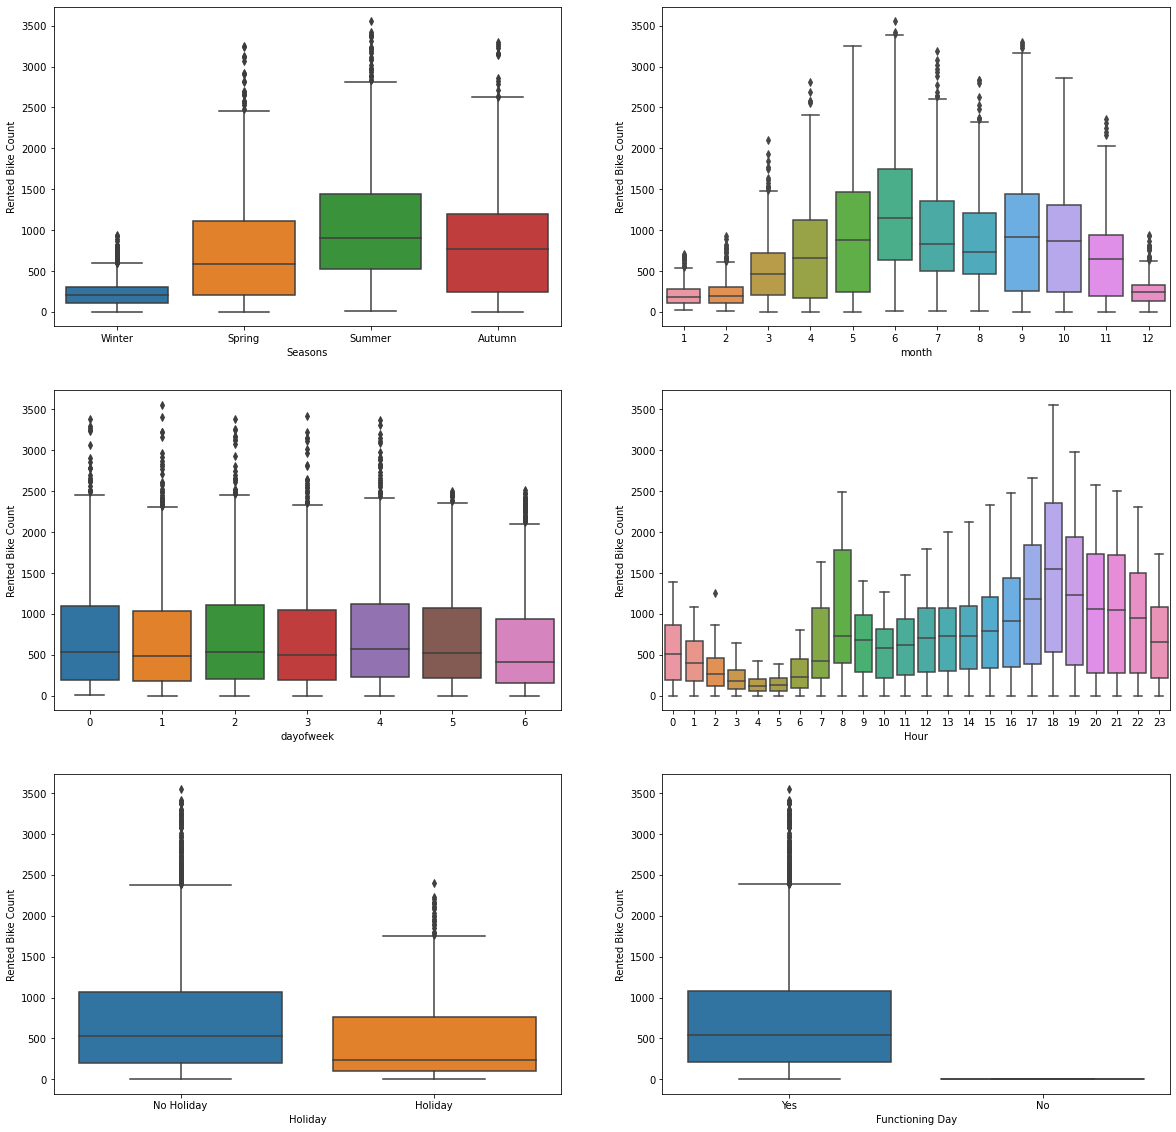

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
sns.boxplot(x=df_raw["Seasons"],y=df_raw["Rented Bike Count"],ax=ax[0][0])
sns.boxplot(x=df_raw["month"],y=df_raw["Rented Bike Count"],ax=ax[0][1])
sns.boxplot(x=df_raw["dayofweek"],y=df_raw["Rented Bike Count"],ax=ax[1][0])
sns.boxplot(x=df_raw["Hour"],y=df_raw["Rented Bike Count"],ax=ax[1][1])
sns.boxplot(x=df_raw["Holiday"],y=df_raw["Rented Bike Count"],ax=ax[2][0])
sns.boxplot(x=df_raw["Functioning Day"],y=df_raw["Rented Bike Count"],ax=ax[2][1])

<AxesSubplot:xlabel='Temperature(_)'>

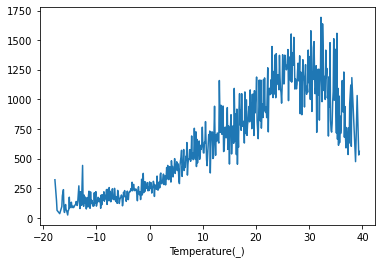

In [35]:
df_raw.groupby('Temperature(_)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Rainfall(mm)'>

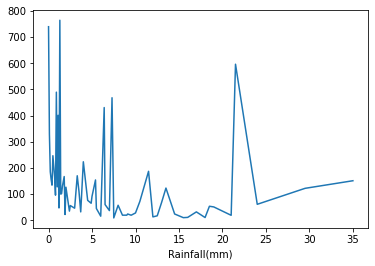

In [36]:
df_raw.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Snowfall (cm)'>

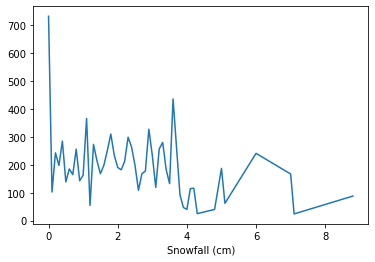

In [37]:
df_raw.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Wind speed (m/s)'>

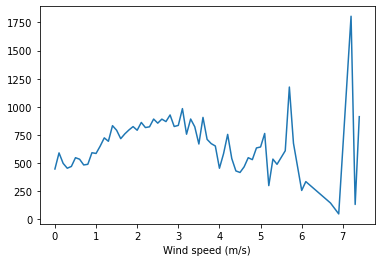

In [38]:
df_raw.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

<AxesSubplot:xlabel='Visibility (10m)'>

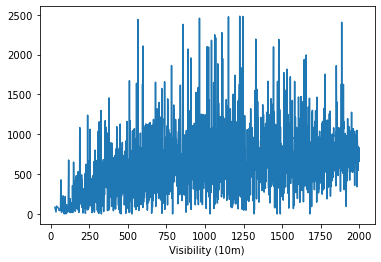

In [39]:
df_raw.groupby('Visibility (10m)').mean()['Rented Bike Count'].plot()

<AxesSubplot:>

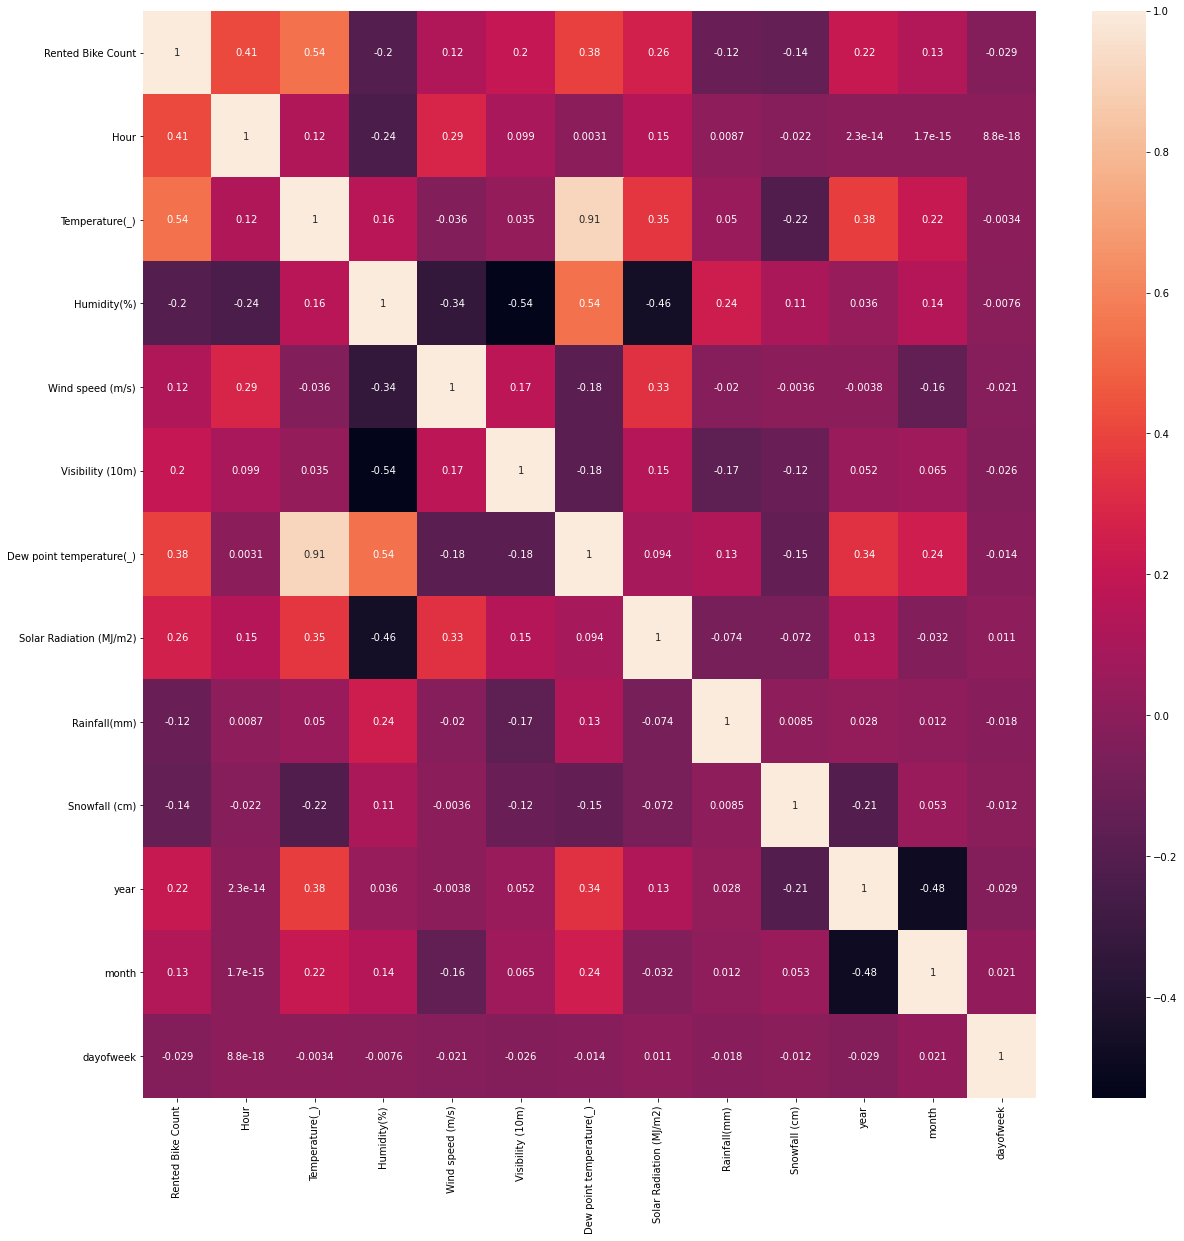

In [42]:
plt.figure(figsize=(20,20))
correlation=df_raw.corr()
sns.heatmap(correlation,annot=True)

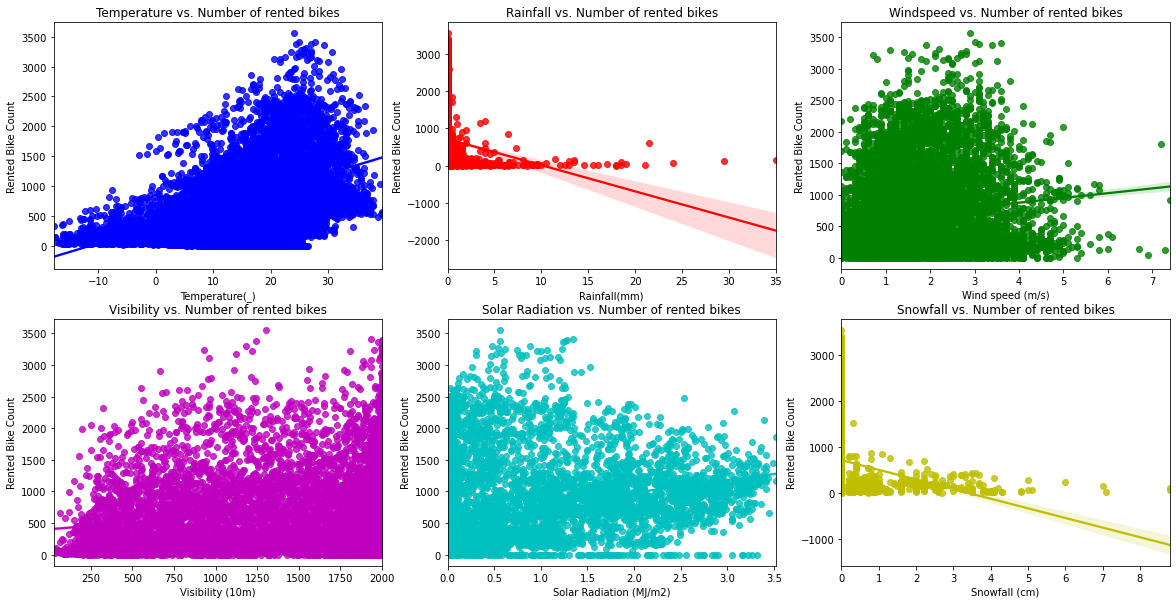

In [55]:
fig = plt.figure(figsize=(20, 10))
axes = fig.add_subplot(2, 3, 1)
sns.regplot(data=df_raw, x='Temperature(_)', y='Rented Bike Count',ax=axes,color='b')
axes.set(title='Temperature vs. Number of rented bikes')
axes = fig.add_subplot(2, 3, 2)
sns.regplot(data=df_raw, x='Rainfall(mm)', y='Rented Bike Count',ax=axes, color='r')
axes.set(title='Rainfall vs. Number of rented bikes')
axes = fig.add_subplot(2, 3, 3)
sns.regplot(data=df_raw, x='Wind speed (m/s)', y='Rented Bike Count',ax=axes, color='g')
axes.set(title='Windspeed vs. Number of rented bikes')
axes = fig.add_subplot(2, 3, 4)
sns.regplot(data=df_raw, x='Visibility (10m)', y='Rented Bike Count',ax=axes, color='m')
axes.set(title='Visibility vs. Number of rented bikes')
axes = fig.add_subplot(2, 3, 5)
sns.regplot(data=df_raw, x='Solar Radiation (MJ/m2)', y='Rented Bike Count',ax=axes, color='c')
axes.set(title='Solar Radiation vs. Number of rented bikes')
axes = fig.add_subplot(2, 3, 6)
sns.regplot(data=df_raw, x='Snowfall (cm)', y='Rented Bike Count',ax=axes, color='y')
axes.set(title='Snowfall vs. Number of rented bikes')
plt.show()